<a href="https://colab.research.google.com/github/anzalshaikh27/TMNIST-Alphabet-94-characters-/blob/main/TMNIST_Alphabet_94_characters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'tmnist-alphabet-94-characters:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1564532%2F2830968%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240409%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240409T190959Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dd796492354146238e82bbbf20f656d474ffaa455f226faf4f30d51bbd2661632fa9eb71cf46f7d52443027bb4ea071c60e68504dbd3bdef85338e9c1e9a6759d0d16dea9ace41060f579ba77232a3cc78881189d83798e2c8514226592b8bc66c9451c6dc113c44704fdd4eaaf37bf096d1040666d2d563ed29630ad316cc2ff6081dc4711286ed8e0e9b0f92400563651cfac8b9d255caa976bbb95f54143c44f176a09aa4b9a4703ea386d5b278aa01c185da90606e5fc61616ca99118bd34ab94968a77bd5b07e42a5b23d410856bf41dc88c99a21ba1b028b32f01d6b61c5c4653974e8aa71c0805f860fd2490cdc9298ff35515c1a107b2e41532c6494e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


### **Neural Network Type Classification | TMNIST**

Find a  "Hello World"  Handwritten Digit Classification (MNIST) tutorial and create a similar tutorial for one of the TMNIST data sets.

### **Abstract**
The aim of this notebook is to comprehend the procedure for developing and training a basic  Neural Network that can categorize handwritten digits obtained from the TMNIST Alphabet (94 characters) dataset.

### **Introduction**

The TMNIST Alphabet dataset consists of images of 94 different characters. Each image in the dataset is a 28x28 grayscale image, and there are a total of 281,000 images in the dataset. The dataset is designed for training and evaluating machine learning models for the task of character recognition.

MNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

This repository contains a single csv .file.
The structure of the csv file is:

- the first row contains column headers ['names', 'labels','1','2',…..'784']
- The 'names' column contains font file names such as 'Acme-Regular' and 'ZillaSlab-Bold'
- The 'labels' column contains characters such as '@','E' or '+'
- The remaining 784 columns contain the grayscale pixel values for the image of the corresponding character in the 'name' font-style


https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters




In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv



### **Installing all required libararies**
- numpy
- tensorflow
- keras
- matplotlib

In [ ]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install pandas
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.8 MB/s eta 0:00:0000:01
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


# Importing necessary Libraries

In [ ]:

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle


import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

2024-04-09 03:19:46.040941: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 03:19:46.041074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 03:19:46.211448: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading Dataset

In [ ]:
# Load and display the dataset
# Update the path based on my environment
dataset_path = '/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv'
df = pd.read_csv(dataset_path)
df.head(5)

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Displaying unique values in the 'labels' column and counting the number of unique classes


In [ ]:
print(df['labels'].unique())
no_of_classes=df['labels'].nunique()
print('Number of classes are',no_of_classes)



['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
Number of classes are 94


In [ ]:
# dropping label columns
X = df.drop(columns=['labels'])
y = df['labels']

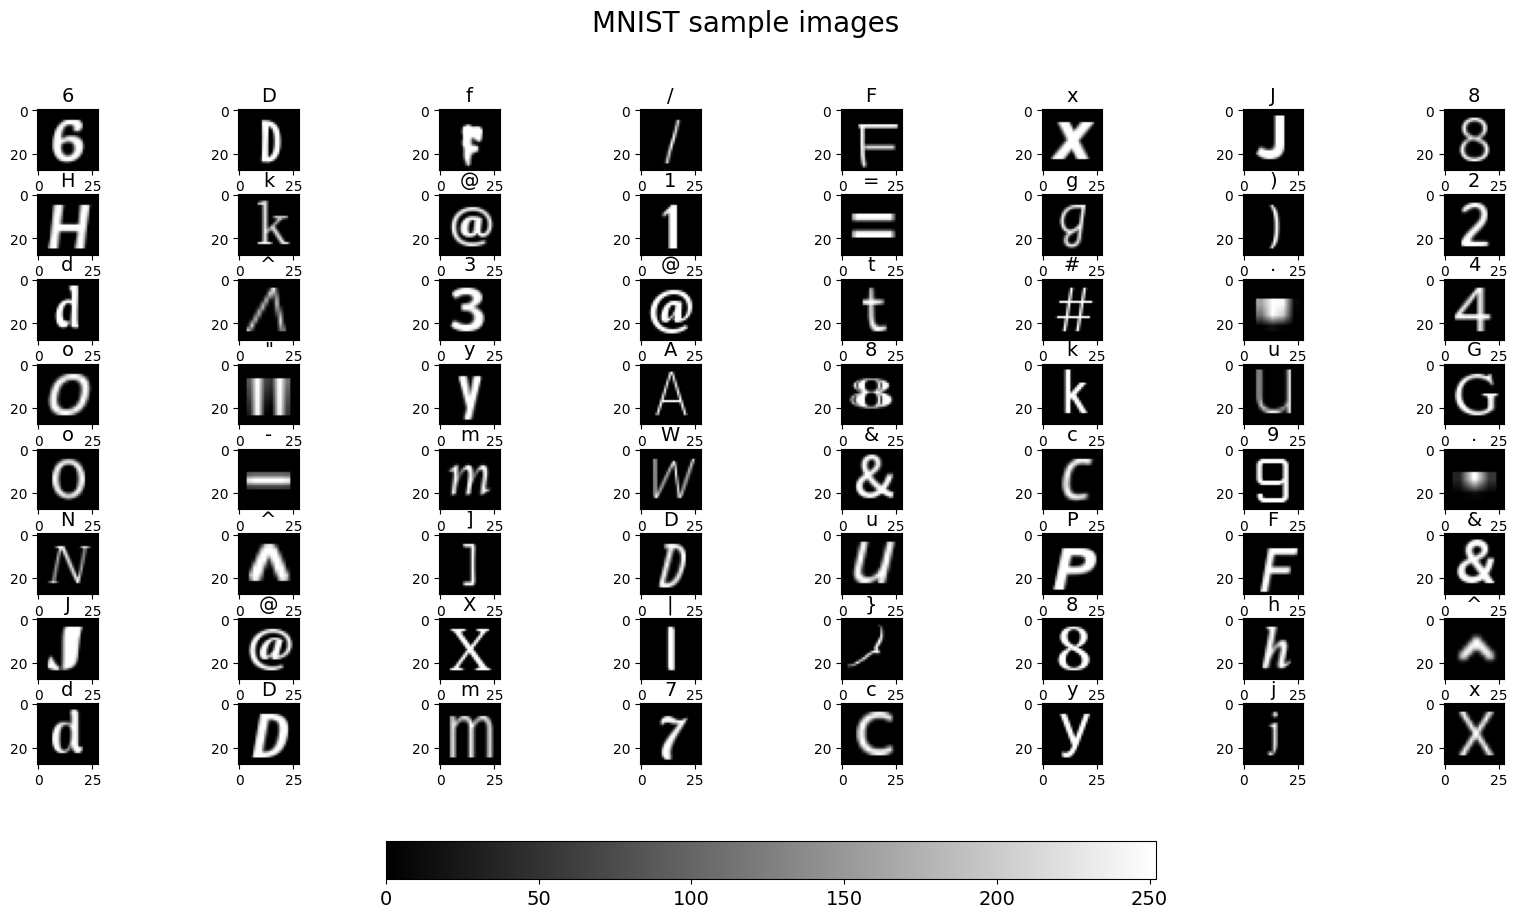

In [ ]:
# Assuming the first column ('label') needs to be excluded from X before reshaping
X_pixels = X.iloc[:, 1:]  # This excludes the first column, adjust accordingly if the extra column is not the first one

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(20, 10))
fig.suptitle("MNIST sample images", fontsize=20)

for i, ax in enumerate(axes.flat):
    # Use X_pixels for reshaping
    img = ax.imshow(X_pixels.values[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    ax.set_title(str(y.iloc[i]), fontsize=14)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
# Adjusting colorbar creation to be compatible with subplots
cbar = fig.colorbar(img, ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.05, pad=0.1)
cbar.ax.tick_params(labelsize=14)

plt.show()



The script displays a 8x8 grid of sample images from the MNIST dataset after excluding the first column from the data. Each image is 28x28 pixels, displayed in grayscale, with its corresponding label shown above. A colorbar is included at the bottom to indicate the grayscale intensity. The output would be a large plot titled "MNIST sample images" showcasing various handwritten characters and symbols with their labels.

# Splitting data into Test and Train sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=32,stratify=y)

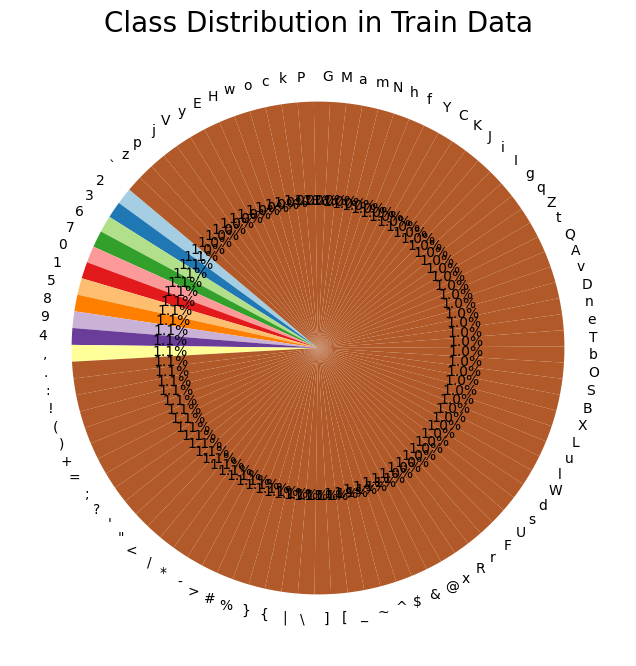

In [ ]:
#checking the distribution of train and test dataset


# Calculate counts and labels for the pie chart
counts = y_train.value_counts()
labels = counts.index

# Define colors for each class
colors = plt.cm.Paired(range(len(labels)))

# Create the pie chart
plt.figure(figsize=(10, 8))  # Adjust the figure size to better fit the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Class Distribution in Train Data', fontsize=20)

# Show the plot
plt.show()


The above code is designed to visualize the distribution of different classes in a training dataset, likely with a focus on character recognition given the labels. It calculates the frequency of each class in the y_train dataset, then creates a pie chart with one "slice" for each class. Each slice is colored differently and the size of each slice represents the relative frequency of that class. The chart starts from a 140-degree angle on the circle to position the first slice. The title of the chart is "Class Distribution in Train Data" and is shown with a significant font size to stand out. When executed, this code will produce a pie chart that allows for quick visual assessment of class balance or imbalance in the training data.

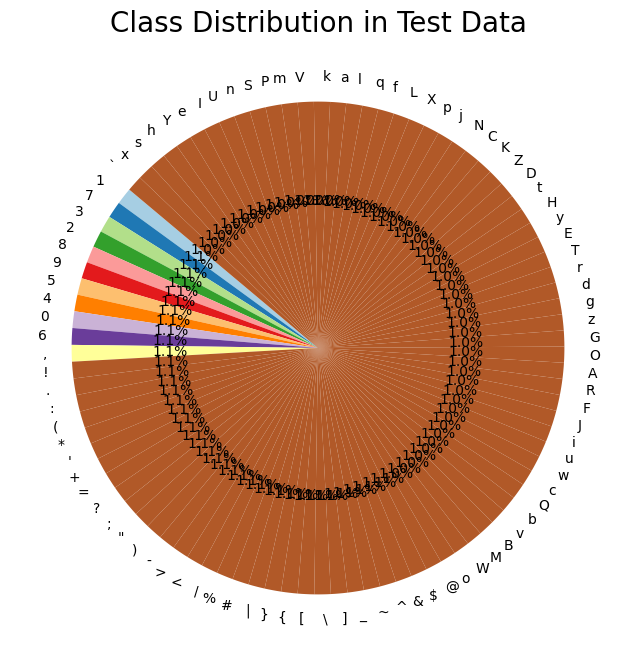

In [ ]:
import matplotlib.pyplot as plt

# Calculate counts and labels for the pie chart
counts = y_test.value_counts()
labels = counts.index

# Define colors for each class
colors = plt.cm.Paired(range(len(labels)))

# Create the pie chart
plt.figure(figsize=(10, 8))  # Adjust the figure size to better fit the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Class Distribution in Test Data', fontsize=20)

# Show the plot
plt.show()


The above code is designed to visualize the distribution of different classes in a testing dataset, likely with a focus on character recognition given the labels. It calculates the frequency of each class in the y_test dataset, then creates a pie chart with one "slice" for each class. Each slice is colored differently and the size of each slice represents the relative frequency of that class. The chart starts from a 140-degree angle on the circle to position the first slice. The title of the chart is "Class Distribution in Test Data" and is shown with a significant font size to stand out. When executed, this code will produce a pie chart that allows for quick visual assessment of class balance or imbalance in the testing data.

# Data Preprocessing and Normalization

In [ ]:
# Example using select_dtypes to exclude non-numeric columns
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])

# Example converting columns to numeric, coercing errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# You may then want to handle NaNs, for example by filling them with zeros, the column mean, or dropping them
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)



X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

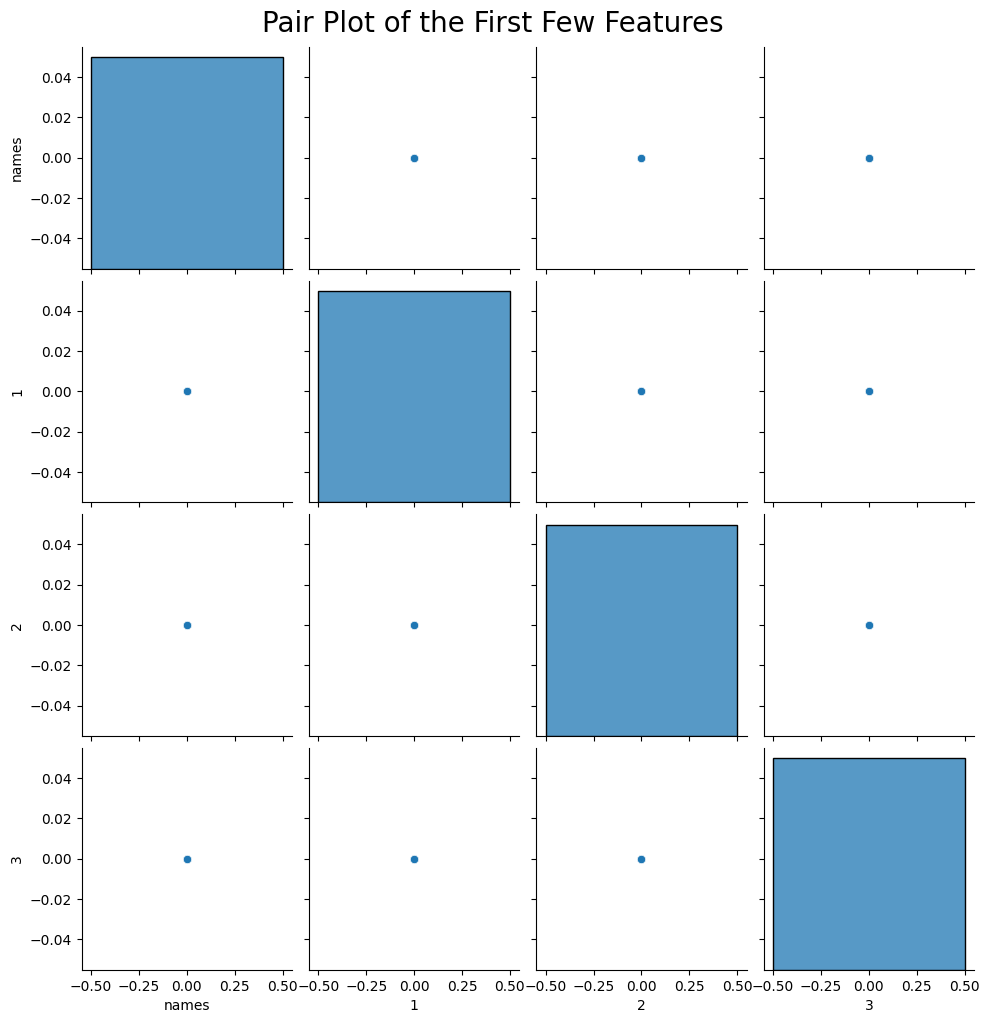

In [ ]:
# Pair Plot for the first few features
sns.pairplot(X_train.iloc[:, :4])  # Adjust the number of features as needed
plt.suptitle('Pair Plot of the First Few Features', size=20, y=1.02)
plt.show()

The above code performs:

1) X_train_numeric and X_test_numeric: Non-numeric columns are excluded from X_train and X_test datasets, leaving only columns of types float64, int64, float32, and int32.

2) Conversion to numeric: It attempts to convert all columns of X_train and X_test to numeric, coercing any errors (non-convertible values) into NaN (not a number).

3) NaN handling: Fills any resulting NaN values in X_train and X_test with zeros.

4) Normalization: Scales X_train and X_test by converting them to float32 type and dividing by 255.0. This is common in image processing to normalize pixel values to a range of [0,1].

5) Pair Plot: A pair plot of the first four features of the X_train dataset is created, showing the relationships between each pair of features. It's useful for spotting trends, correlations, or distributions within the features.

Output:

- Two datasets (X_train_numeric and X_test_numeric) that contain only numeric data.
- X_train and X_test datasets with all non-numeric values converted to NaN, then filled with zeros.
- The datasets will be scaled to have values between 0 and 1.
- A visual pair plot displaying the relationships between the first four features of the X_train dataset, which can reveal insights into the structure of the data.

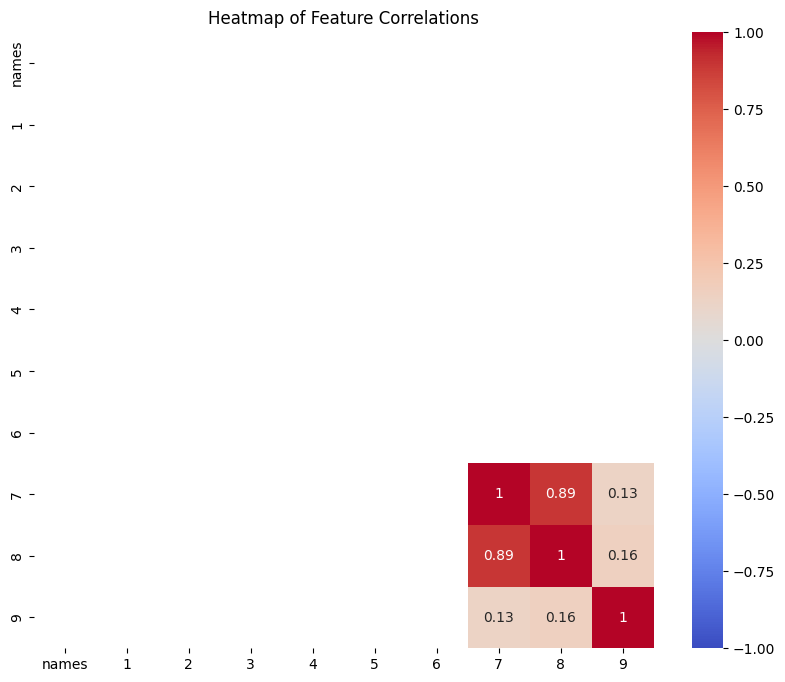

In [ ]:
# Compute the correlation matrix
corr = X_train.iloc[:, :10].corr()  # Using more features will make the heatmap more crowded

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Feature Correlations')
plt.show()

This above code creates a heatmap to visualize the correlation matrix of the first ten features of the X_train dataset:

1) corr = X_train.iloc[:, :10].corr(): Computes the correlation coefficients between the first ten features of the X_train dataset.

2) The sns.heatmap function: Plots the correlation matrix as a heatmap. Each cell in the heatmap shows the correlation coefficient between two features, with annot=True to display the actual numeric values in the cells. The color scheme ('coolwarm') varies from -1 to 1, where -1 indicates a perfect negative correlation, 0 no correlation, and 1 a perfect positive correlation.

3) plt.title('Heatmap of Feature Correlations'): Sets the title of the heatmap.

Output:

It shows a 10x10 heatmap where the color intensity and the annotated values give a quick visual indication of how strongly each pair of features is correlated. Features with high positive correlation will have warmer colors (red), high negative correlation with cooler colors (blue), and no correlation will be more neutral (white or light blue/red).

# y_train and y_test are encoded into one-hot vectors using the OneHotEncoder

In [ ]:
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded=enc.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded=  enc.transform(y_test.values.reshape(-1,1))

The above encodes categorical labels into a one-hot numerical format suitable for machine learning models using scikit-learn's OneHotEncoder:

1) enc = OneHotEncoder(sparse=False, handle_unknown='ignore'): Creates an instance of OneHotEncoder that will transform categorical data into a matrix of binary values. The parameter sparse=False tells the encoder to return a dense array instead of a sparse matrix, which can be more memory-intensive but easier to work with for some operations. The handle_unknown='ignore' parameter instructs the encoder to ignore categories in the validation data that were not present during the fitting process, avoiding errors during transformation.

2) y_train_encoded = enc.fit_transform(y_train.values.reshape(-1,1)): Fits the encoder to the y_train data, learning the categories, and then transforms y_train into a one-hot encoded format. The .reshape(-1,1) ensures the data is formatted as a 2D array with one column, as required by the encoder.

3) y_test_encoded = enc.transform(y_test.values.reshape(-1,1)): Transforms the y_test data into the one-hot encoded format using the already fitted encoder. This ensures that the encoding is consistent with the y_train encoding.

4) The output shows two arrays y_train_encoded and y_test_encoded where each row corresponds to a one-hot encoded representation of the original label from y_train and y_test, respectively. These can be used as the target variables for training and testing in supervised machine learning models.








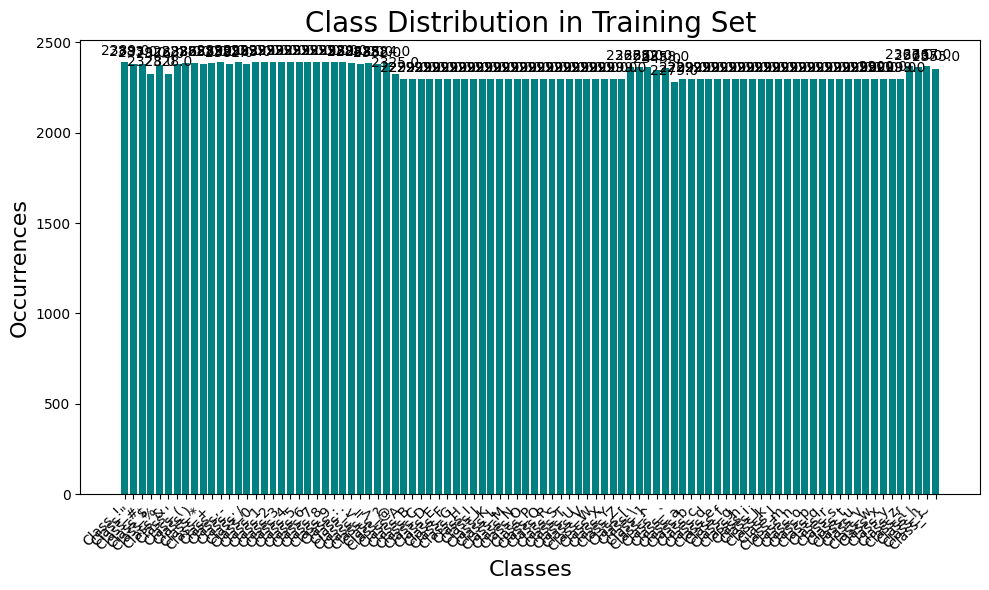

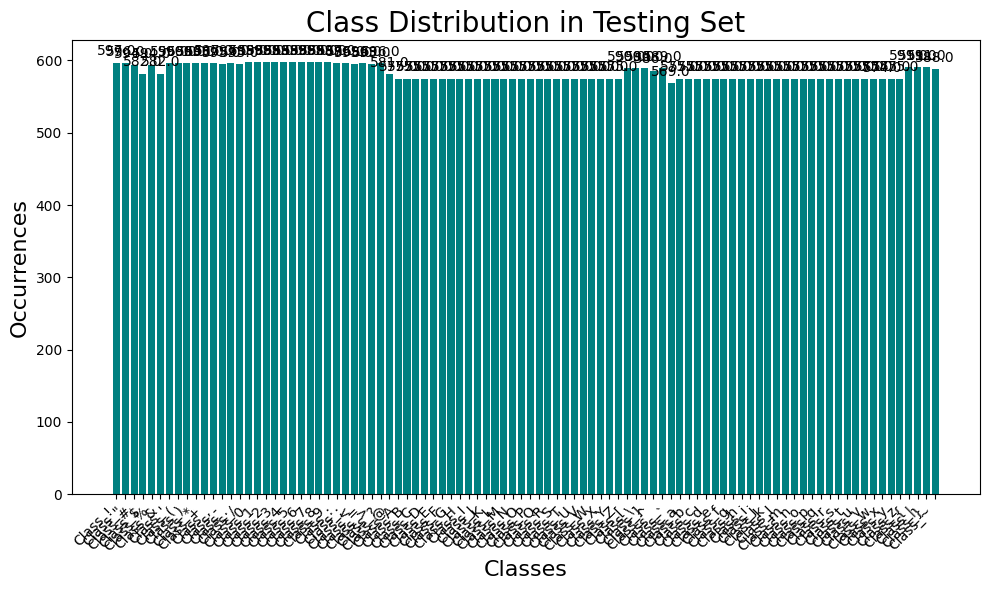

In [ ]:
# Sum up occurrences of each class in the encoded arrays
y_train_sum = y_train_encoded.sum(axis=0)
y_test_sum = y_test_encoded.sum(axis=0)

# Get the class labels from the encoder
class_labels = enc.get_feature_names_out(input_features=['Class'])

def plot_class_distribution(class_sums, class_labels, title):
    """
    Plot the class distribution as a bar plot.

    Parameters:
    - class_sums: Array of sums of occurrences for each class
    - class_labels: Labels of the classes
    - title: Title for the plot
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(class_labels, class_sums, color='teal')

    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Classes', fontsize=16)
    ax.set_ylabel('Occurrences', fontsize=16)
    ax.set_xticks(np.arange(len(class_labels)))
    ax.set_xticklabels(class_labels, rotation=45, ha="right")

    # Adding the text labels on the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plotting class distribution for training and testing sets
plot_class_distribution(y_train_sum, class_labels, 'Class Distribution in Training Set')
plot_class_distribution(y_test_sum, class_labels, 'Class Distribution in Testing Set')

The above code counts the occurrences of each class in the one-hot encoded training and testing label datasets, then plots these counts as bar charts:

1) y_train_sum and y_test_sum: The sums of each class's occurrences in the one-hot encoded y_train_encoded and y_test_encoded arrays, respectively. Each sum represents the total count of samples for each class in the respective dataset.

2) class_labels = enc.get_feature_names_out(input_features=['Class']): Retrieves the class labels from the OneHotEncoder, which are used as x-axis tick labels in the bar charts.

3) plot_class_distribution: A function defined to plot the class distribution. It creates a bar chart with class occurrences on the y-axis and class labels on the x-axis, includes a title, labels for axes, and annotates each bar with its height (count of occurrences).

4) Finally, the function is called twice to plot the distribution of class occurrences in both the training and testing sets, with appropriate titles.

5) The output shows two bar charts showing the frequency of each class in the training and testing datasets, making it easy to compare and visualize the distribution and potentially identify any imbalances.








# Reshape the pixel data to (28, 28) format

In [ ]:
# Assuming the extra feature is the last column, you can exclude it like this:
X_train_pixels = X_train.iloc[:, :-1]  # Exclude the last column
X_test_pixels = X_test.iloc[:, :-1]    # Exclude the last column

# Now, you can safely reshape the pixel data to (28, 28) format
X_train_norm = X_train_pixels.values.reshape(-1, 28, 28)
X_test_norm = X_test_pixels.values.reshape(-1, 28, 28)



The above code processes image pixel data for use in machine learning, particularly in training and testing sets. It assumes that each dataset contains an extra feature in the last column that is not needed (perhaps a label or an index), and excludes this column. Then it reshapes the remaining pixel data into a 28x28 array which is the typical size for MNIST images. This reshaping is necessary to work with image data in algorithms that require a two-dimensional input per sample, such as convolutional neural networks. The output will be two sets of arrays (X_train_norm and X_test_norm) ready for use in image processing tasks.

# Creating Convolutional Neural Network (CNN) for image classification

The below provided code outlines the construction of a Convolutional Neural Network (CNN) for image classification tasks, utilizing TensorFlow's Keras API. This CNN architecture is specifically tailored for analyzing images and is capable of recognizing patterns with varying degrees of complexity. The sequence of layers is designed to systematically extract and interpret the information contained in the images, leading to a final classification. Here's an insight into the architecture and functionality of each component in the model:

--> Reshape Layer: Initializes the process by reshaping the input images into a consistent format (28x28 pixels with a single color channel), making them suitable for processing by convolutional layers. This step is crucial for grayscale images commonly used in tasks like handwriting recognition.

--> Conv2D Layers: These layers are the core building blocks of the CNN. They perform convolution operations to detect features such as edges, textures, and other patterns within the images. The model uses filters of increasing counts (64, 128, and 256) to capture more refined details as the data progresses through the network. The padding='same' ensures the output volume matches the input volume's spatial dimensions, preserving edge information.

--> BatchNormalization Layers: Positioned after convolutional layers, these normalize the input layer by adjusting and scaling the activations. This normalization helps stabilize and speed up the training process, improving the model's performance by reducing internal covariate shift.

--> MaxPooling2D Layers: These layers reduce the spatial dimensions (width and height) of the input volume, focusing on the most prominent features while discarding irrelevant details. This operation significantly decreases the computational complexity and helps prevent overfitting by abstracting the input representations.

--> Dropout Layers: A regularization technique where randomly selected neurons are ignored during training, making the model less sensitive to the specific weights of neurons. This leads to a more robust, generalized model and reduces overfitting. The dropout rate specifies the proportion of neurons to drop, with different rates used throughout the model to balance between learning and regularization.

--> Flatten Layer: Converts the multidimensional output of the convolutional layers into a flat vector. This transformation is necessary to transition from feature extraction layers (convolutional and pooling layers) to classification layers (dense layers).

--> Dense Layers: These fully connected layers interpret the features extracted by the convolutional layers to perform classification. The network includes dense layers with decreasing units, culminating in a final dense layer with a number of units equal to the number of classes, employing a softmax activation function to derive probabilities for each class.

--> Optimizer (Adam): Specifies the optimization algorithm used to minimize the loss function during training. Adam is an efficient stochastic optimization method that adjusts the learning rate on a per-parameter basis, using estimates of lower-order moments. The learning rate of 0.001 is chosen to balance the speed and stability of the learning process.

This model is a comprehensive example of a CNN designed for high accuracy in image classification tasks, incorporating advanced techniques like BatchNormalization and Dropout to enhance training efficiency and model generalization.








In [ ]:
from tensorflow.keras.layers import Reshape, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_new = Sequential([
    Reshape((28,28,1), input_shape=(28,28)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(no_of_classes, activation='softmax')
])

opt = Adam(lr=0.001)


In [ ]:
from tensorflow.keras.utils import plot_model

model_new.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_new.summary()

# For a graphical representation
plot_model(model_new, to_file='model_new.png', show_shapes=True, show_layer_names=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       7

The above code is compiling a neural network model called model_new and generating a graphical representation of its architecture:

1) model_new.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']): It compiles the model_new neural network, setting up the optimization algorithm (opt), the loss function to use (categorical_crossentropy, which is common for multi-class classification problems), and the metric to monitor during training (accuracy).

2) model_new.summary(): Prints a summary of the model, listing all layers, their shapes, and the number of parameters.

3) plot_model(model_new, to_file='model_new.png', show_shapes=True, show_layer_names=True): Creates a visual plot of the model architecture, showing how layers are stacked and connected, including the shape of the data at each layer and the names of the layers. This image is saved to a file named model_new.png.

4) The output of the script shows a compiled model ready for training and a PNG file with a visual representation of the model's structure.

# Compiling the model

In [ ]:
model_new.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_new.summary()

                                                                 
 batch_normalization_4 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_5 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (

model_new.summary(): After compiling the model, invoking model_new.summary() prints a summary representation of the model. This summary includes:

- The layers and their types, sequentially as they are stacked in the model.
- The output shape of each layer, showing how data dimensions transform through the model. For convolutional and pooling layers, this reflects the spatial dimensions and the depth of the feature maps. For dense layers, it reflects the number of neurons.
- The number of parameters (weights and biases) in each layer and the total across the model. Parameters in trainable layers will be updated during training, and this count provides insight into the model's complexity and capacity.

# Training the model

In [ ]:
model_history=model_new.fit(X_train_norm, y_train_encoded, epochs=10, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/10
1714/1714 - 667s - loss: 1.3167 - accuracy: 0.6391 - val_loss: 0.3630 - val_accuracy: 0.8912 - 667s/epoch - 389ms/step
Epoch 2/10
1714/1714 - 668s - loss: 0.4968 - accuracy: 0.8523 - val_loss: 0.2861 - val_accuracy: 0.9164 - 668s/epoch - 390ms/step
Epoch 3/10
1714/1714 - 672s - loss: 0.4099 - accuracy: 0.8797 - val_loss: 0.2652 - val_accuracy: 0.9192 - 672s/epoch - 392ms/step
Epoch 4/10
1714/1714 - 658s - loss: 0.3561 - accuracy: 0.8957 - val_loss: 0.2392 - val_accuracy: 0.9278 - 658s/epoch - 384ms/step
Epoch 5/10
1714/1714 - 666s - loss: 0.3266 - accuracy: 0.9035 - val_loss: 0.2176 - val_accuracy: 0.9323 - 666s/epoch - 388ms/step
Epoch 6/10
1714/1714 - 666s - loss: 0.3056 - accuracy: 0.9104 - val_loss: 0.2306 - val_accuracy: 0.9292 - 666s/epoch - 388ms/step
Epoch 7/10
1714/1714 - 668s - loss: 0.2911 - accuracy: 0.9144 - val_loss: 0.2217 - val_accuracy: 0.9307 - 668s/epoch - 390ms/step
Epoch 8/10
1714/1714 - 673s - loss: 0.2786 - accuracy: 0.9169 - val_loss: 0.2055 - val_acc

model_new.fit(...): This method trains the model on the specified dataset for a fixed number of epochs. It iteratively updates the model's weights to minimize the loss function defined during the model's compilation. The method returns a history object containing training and validation loss values, along with metrics (in this case, accuracy), for each epoch. This history can be used for analyzing the model's performance over time.

- Training Data: The model is trained using X_train_norm (normalized training images) as input features and y_train_encoded (one-hot encoded class labels) as target outputs.

- Epochs (epochs=110): The model will go through the entire training dataset 110 times. Each epoch represents one complete pass of the training data through the model. More epochs can allow for more learning opportunities, but also risk overfitting if not carefully monitored.

- Validation Data (validation_data=(X_test_norm, y_test_encoded)): In addition to training data, the model is evaluated on a separate dataset not seen during training (in this case, normalized test images and their corresponding one-hot encoded labels). This evaluation happens at the end of each epoch, providing insight into how well the model generalizes to new data.

- Verbose (verbose=2): This parameter controls the verbosity of the training process output. Setting it to 2 indicates that the method will print one line per epoch, showing the epoch number, training loss, training accuracy, validation loss, and validation accuracy.

- Batch Size (batch_size=128): This specifies the number of samples per gradient update for training. Smaller batch sizes require less memory and can provide a regularization effect, potentially leading to better generalization. However, they may also lead to slower convergence. A batch size of 128 is a common choice that balances these factors.


In [ ]:
score = model_new.evaluate(X_train_norm,y_train_encoded, batch_size = 64,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

Test Accuracy:94.56%


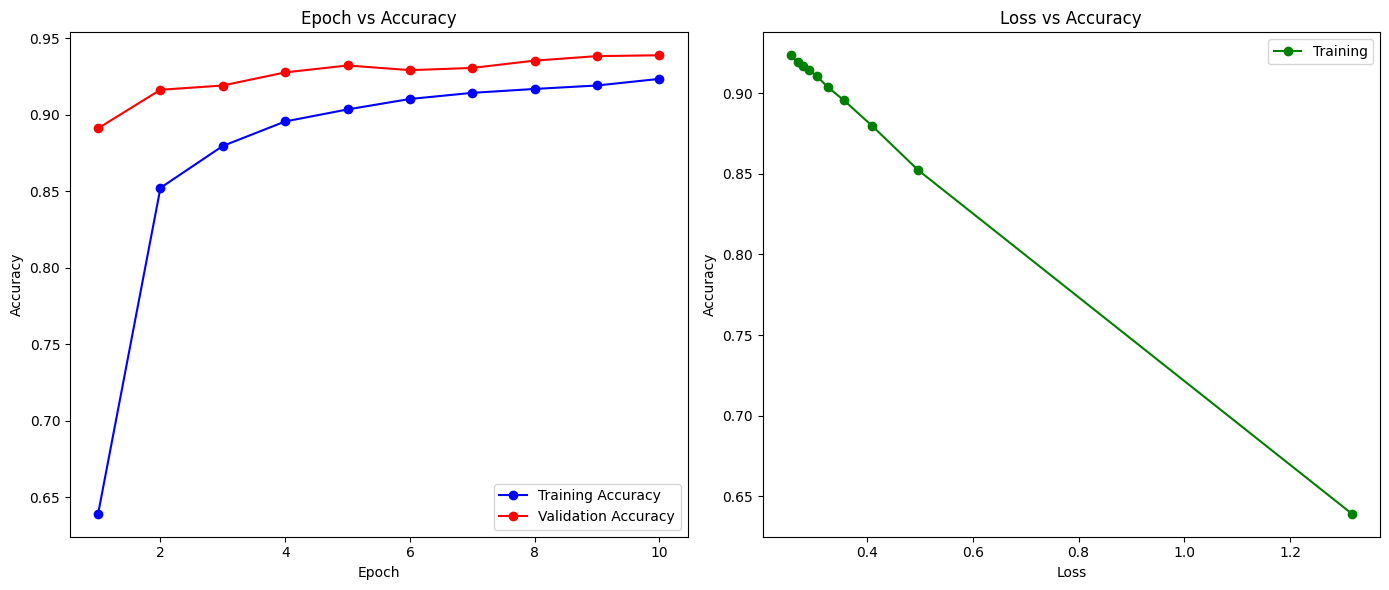

In [ ]:
# Extracting values from the history object
epochs = range(1, len(model_history.history['accuracy']) + 1)
train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
train_loss = model_history.history['loss']

# Plotting Epoch vs Accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss vs Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(train_loss, train_accuracy, 'go-', label='Training')
plt.title('Loss vs Accuracy')
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

The above script plots the training history of a neural network model:

- It extracts the epoch count, training accuracy, validation accuracy, and training loss from the model_history.history object.

- Two plots are created side by side. The first plot shows the training and validation accuracy over each epoch, providing insight into how the model's performance improves with each epoch on both the training and validation datasets.

- The second plot shows the relationship between training loss and training accuracy, which helps in understanding how the decrease in loss is related to an increase in accuracy during training.

# Conclusion:

- The dataset includes a large number of images (281,000), which are used for training machine learning models for character recognition.

- The data is preprocessed by excluding non-numeric columns, converting columns to numeric while coercing errors to NaN, handling NaNs by filling them with zeros, and normalizing pixel values by scaling them between 0 and 1.

- The data is split into training and testing sets with a focus on maintaining an equal distribution of classes in both sets, as visualized by the pie charts.

- A Convolutional Neural Network (CNN) is constructed for image classification with various layers including Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, and Dropout. The model uses the Adam optimizer and categorical_crossentropy for loss.

- The model is trained on the dataset, achieving a high accuracy rate. Training and validation accuracies are visualized in plots showing the progress over epochs.

- One-hot encoding is applied to y_train and y_test to prepare the target variable for model training.

- The pixel data is reshaped into a (28, 28) format after removing any extra features, ensuring it's in the correct shape for input into the CNN.

- The model achieved a final accuracy of 94.56% on the training set.

# Model Accuracy is 94.56%

MIT License

Copyright (c) 2024 Anzal Shaikh

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.